Test Accuracy with Random Forest: 0.6776689014956163


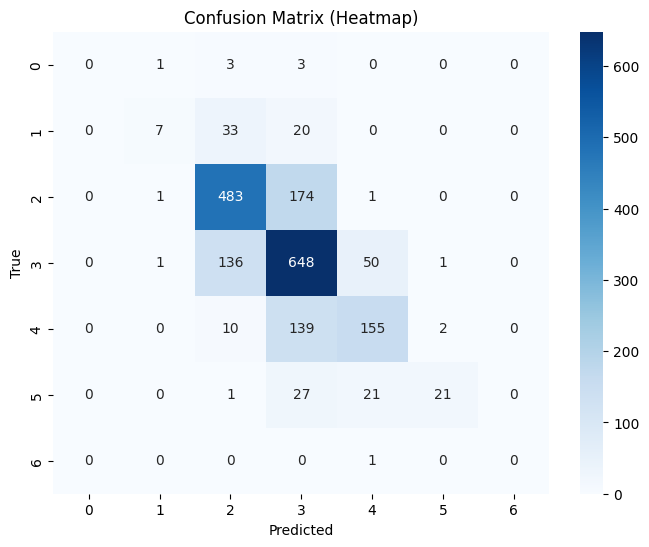

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

wine_df = pd.read_csv("wine.csv")

wine_df.dropna(axis=0, inplace=True)

label_encoder = LabelEncoder()
wine_df['type'] = label_encoder.fit_transform(wine_df['type'])

features = wine_df.columns.drop('quality')
X = wine_df[features]
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=5)
rf_classifier.fit(X_train_scaled, y_train)
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Random Forest: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Heatmap)')
plt.show()
